# Prediction using Decision Tree Algorithm

Problem statement: Create Decision Tree Classifier and visualise it graphically using Iris dataset

#### By: Sneha Prasad

*Dataset Description*
- Id            : ID of the Species
- SepalLengthCm : Length of the Sepal
- SepalWidthCm  : Width of the Sepal
- PetalLengthCm : Length of the Petal
- PetalWidthCm  : Width of the Petal
- Species       : a group of living organisms consisting of similar individuals capable of exchanging genes

# Import Libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.tree import plot_tree

# Loading dataset

In [12]:
df=pd.read_csv(r'C:\Users\HP\Downloads\Iris (1).csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Analysing Dataset

In [13]:
df.shape

(150, 6)

In [14]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [16]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

No missing values

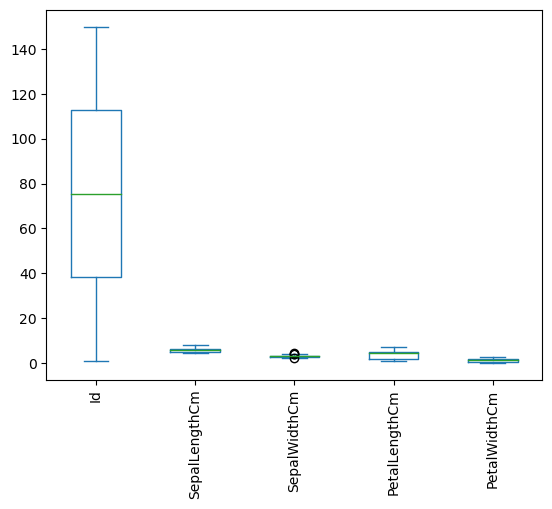

In [26]:
df.plot(kind='box')
plt.xticks(rotation=90)
plt.show()

Sepalwidth has outliers

In [27]:
df.drop('Id', axis=1, inplace=True)

The column Id has unique values so there is no significance for this columns. Hence, we dropped Id.

In [29]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [30]:
d={'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
df.Species=df.Species.map(d)

In [31]:
df.Species

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

# EDA

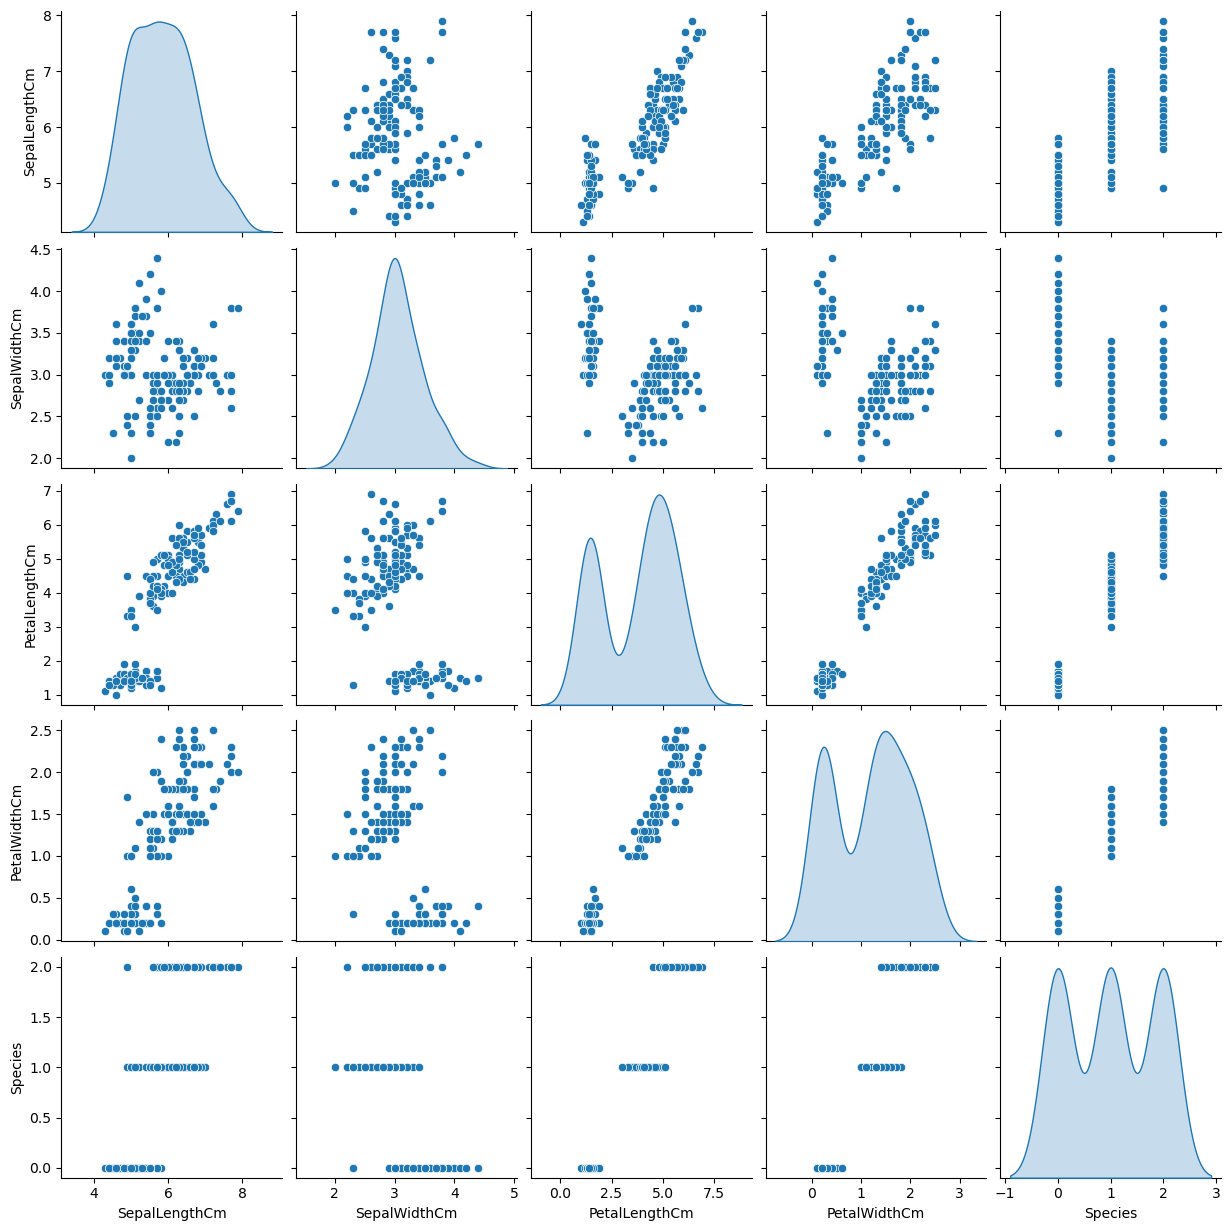

In [36]:
sns.pairplot(df,diag_kind='kde')
plt.show()

* PetalLength and petalwidth are in positive relationship
* Pedallength and Sepallength are in strong positive correlation
* Remaining all features are in slightly positively correlated

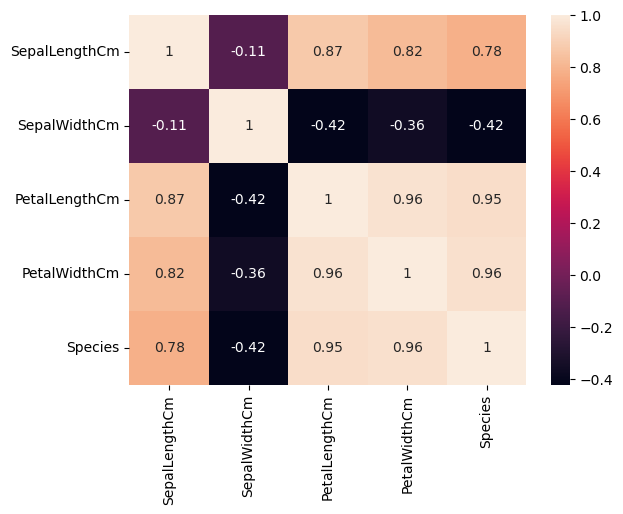

In [39]:
sns.heatmap(df.corr(), annot=True)
plt.show()

* By analysing heatmap , we can understand that SepalLength has high Correlation with PetalWidth and Petallength

# Model Building

In [42]:
X=df.drop('Species', axis=1)
y=df.Species
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=0)

In [44]:
dt=DecisionTreeClassifier()
dt_model=dt.fit(X_train, y_train)

In [46]:
y_pred=dt_model.predict(X_test)

In [49]:
accuracy_score(y_test, y_pred)

0.9736842105263158

In [50]:
f1_score(y_test, y_pred, average='weighted')

0.9739522830846216

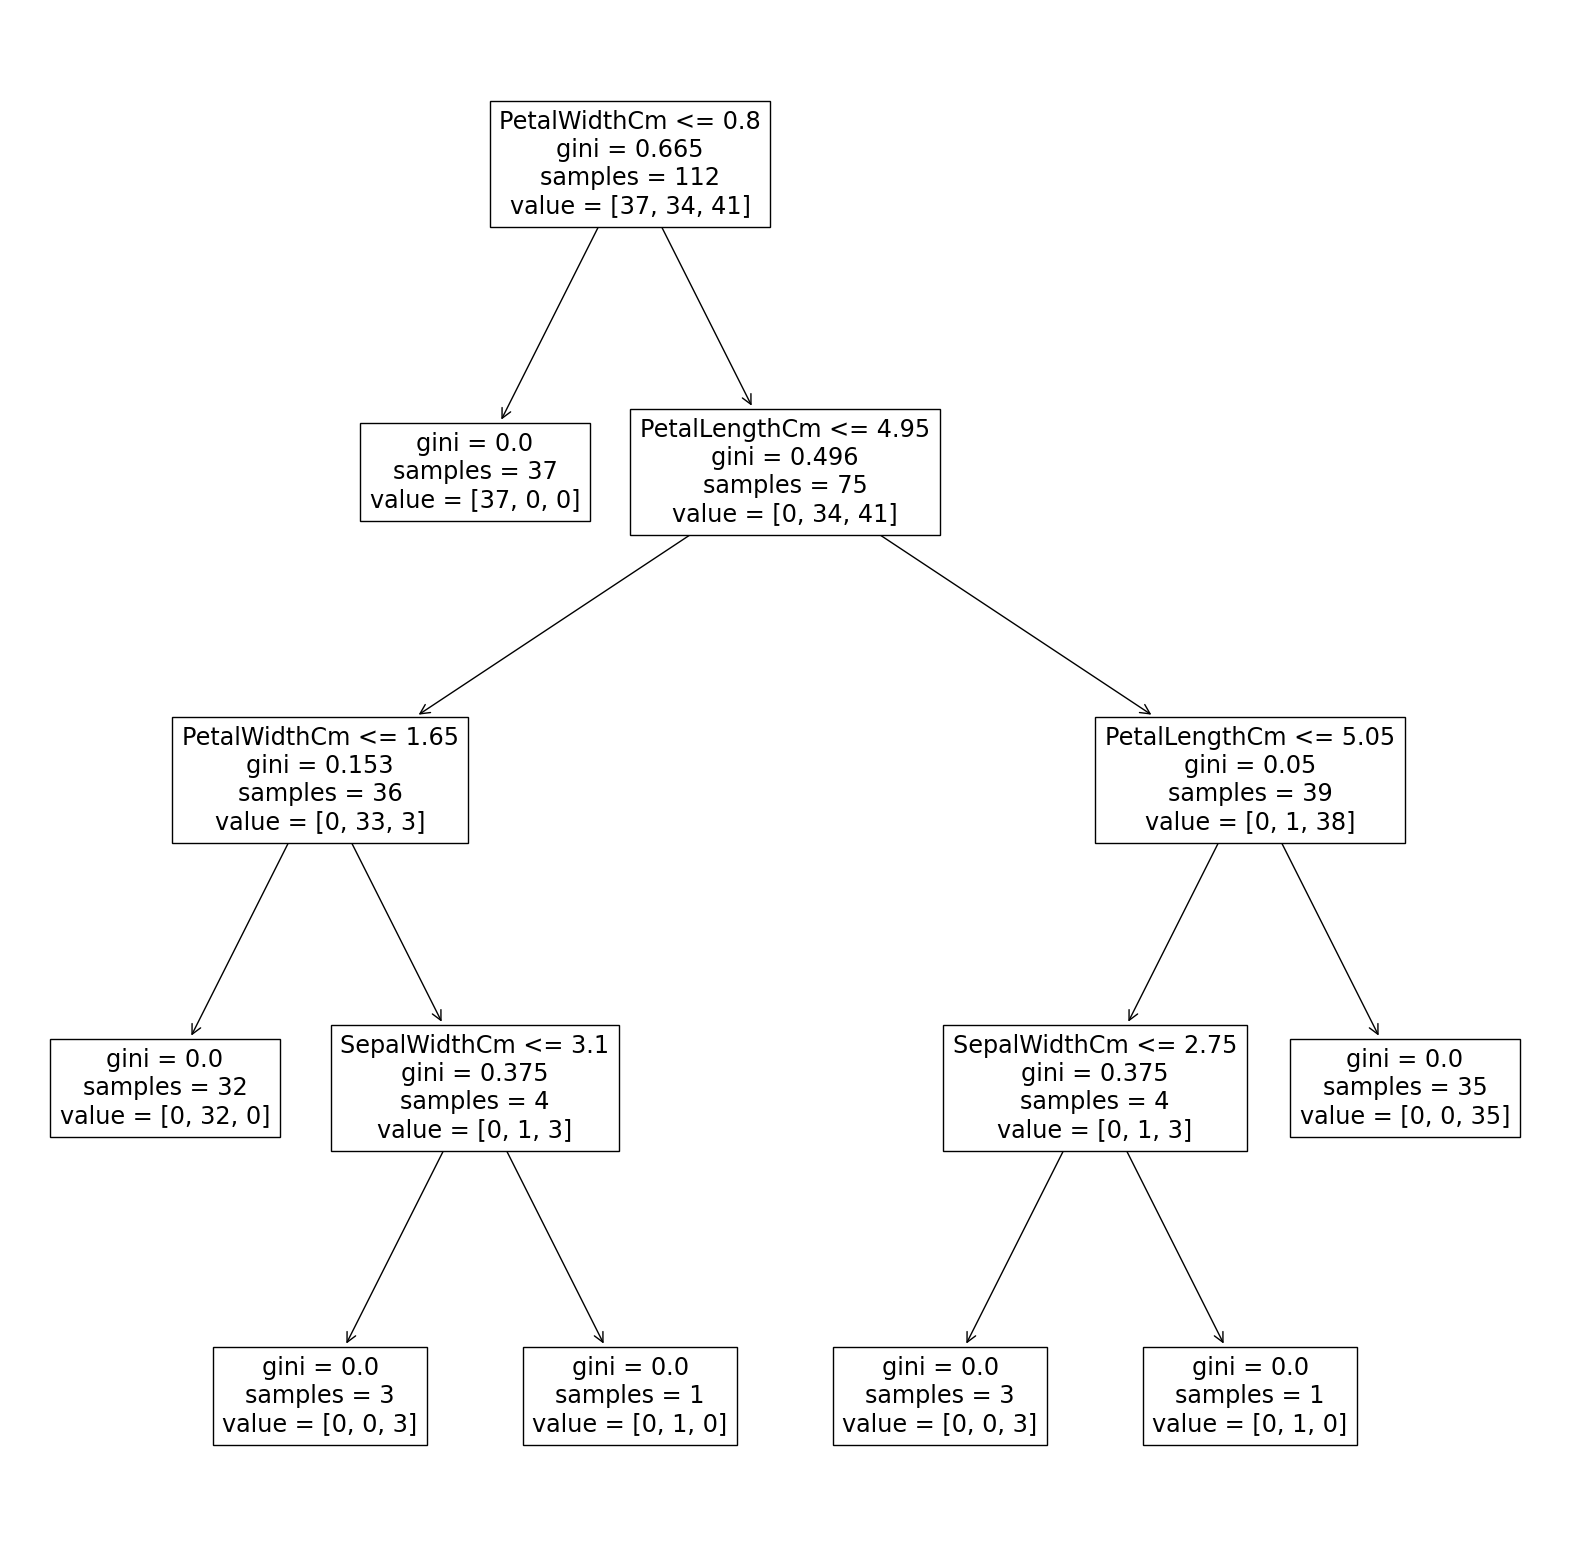

In [58]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model,feature_names=X_train.columns)
plt.show()